In [8]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [29]:
# Load the dataset
df_train = pd.read_csv("toxic-comment-train.csv.zip")

# Preview dataset
print(df_train.head())

# Check data distribution for toxicity labels
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(df_train[toxicity_columns].sum())  # Total counts for each label


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  \
0             0        0       0       0              0   
1             0        0       0       0              0   
2             0        0       0       0              0   
3             0        0       0       0              0   
4             0        0       0       0              0   

                                      input_word_ids  \
0  (101, 27746, 31609, 11809, 24781, 10105, 70971...   
1  (101, 141, 112, 56237, 10874, 106, 10357, 1

In [31]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df_train.shape


(223549, 11)

In [33]:
# checking if null values are present or not

df_train.isnull().sum()

id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
input_word_ids    0
input_mask        0
all_segment_id    0
dtype: int64

In [34]:
df_train['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [35]:
df_train['toxic'].head()

0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64

In [36]:
#Compute the percentage of toxic comments in the dataset
# Total comments
total_comments = len(df)
print(f"Total comment: {total_comments}") #totlal number of rows

# Toxic comments (at least one toxicity label is 1)
df_train['is_toxic'] = df[toxicity_columns].sum(axis=1) > 0
toxic_comments = df['is_toxic'].sum()
print(f"Toxic comments: {toxic_comments}") 

# Toxicity prevalence
toxicity_prevalence = (toxic_comments / total_comments) * 100
print(f"Toxicity Prevalence: {toxicity_prevalence:.2f}%")


Total comment: 223549
Toxic comments: 22468
Toxicity Prevalence: 10.05%


In [21]:
#Estimate Manual Moderation Costs
#Assume a cost per comment for manual moderation and calculate the total cost for handling toxic comments manually.

# Assumed cost per comment for manual moderation
cost_per_comment = 0.10  # Adjust this value as needed

# Manual moderation cost
manual_moderation_cost = toxic_comments * cost_per_comment
print(f"Estimated Manual Moderation Cost: ${manual_moderation_cost:.2f}")

Estimated Manual Moderation Cost: $2246.80


In [22]:
#Estimate Costs for Automated Moderation Include development, deployment, and operational costs for an AI solution.


# Assumed costs for an automated moderation system
development_cost = 5000  # One-time cost
deployment_cost = 2000   # One-time cost
operational_cost_per_comment = 0.02  # Cost per comment moderated by the model

# Automated moderation cost
automated_moderation_cost = development_cost + deployment_cost + (total_comments * operational_cost_per_comment)
print(f"Estimated Automated Moderation Cost: ${automated_moderation_cost:.2f}")

Estimated Automated Moderation Cost: $11470.98


In [23]:
#Perform Cost-Benefit Analysis Compare manual and automated moderation costs to determine potential savings.

# Cost savings
cost_savings = manual_moderation_cost - automated_moderation_cost
print(f"Potential Cost Savings with Automation: ${cost_savings:.2f}")

Potential Cost Savings with Automation: $-9224.18


In [24]:
#Risk Assessment-Evaluate risks associated with automation, such as false positives and negatives, using a confusion matrix from model predictions.

from sklearn.metrics import confusion_matrix, classification_report

# Assume `y_true` (actual labels) and `y_pred` (predicted labels) are available
# Replace with actual data or model predictions
y_true = df_train['is_toxic']
y_pred = np.random.choice([0, 1], size=len(y_true), p=[0.85, 0.15])  # Example predictions

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

Confusion Matrix:
 [[170756  30325]
 [ 19038   3430]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.85      0.87    201081
        True       0.10      0.15      0.12     22468

    accuracy                           0.78    223549
   macro avg       0.50      0.50      0.50    223549
weighted avg       0.82      0.78      0.80    223549



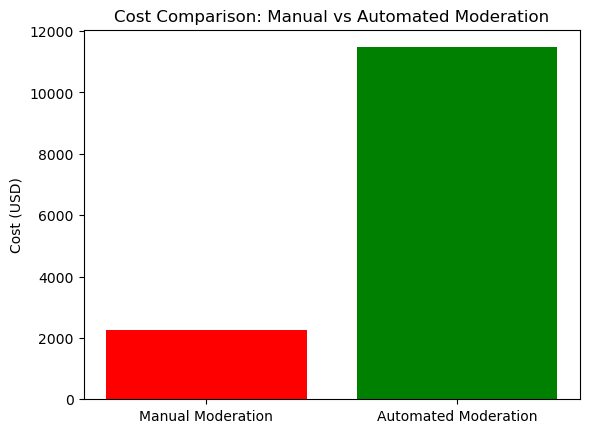

In [25]:
#Visualize Results-Use charts to present data distribution, cost comparisons, and model performance.

# Visualizing cost comparison
categories = ['Manual Moderation', 'Automated Moderation']
costs = [manual_moderation_cost, automated_moderation_cost]

plt.bar(categories, costs, color=['red', 'green'])
plt.title("Cost Comparison: Manual vs Automated Moderation")
plt.ylabel("Cost (USD)")
plt.show()

In [ ]:
#Deploying ML Model 


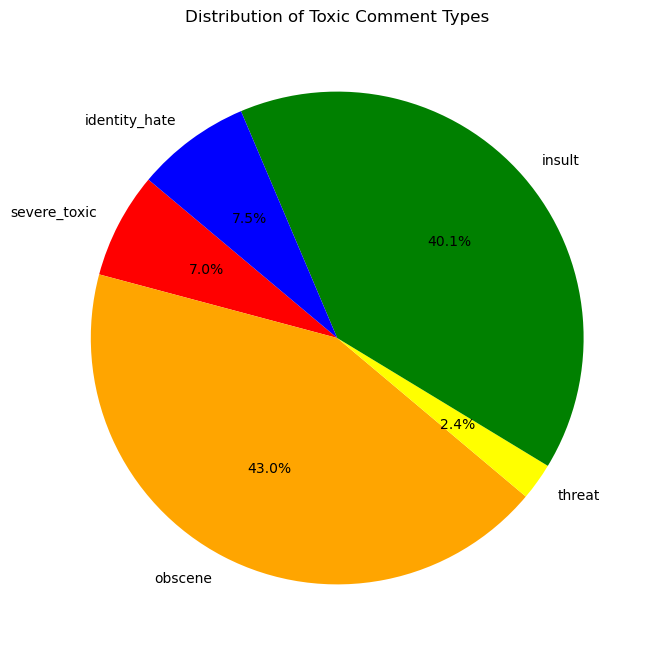

In [37]:
types = df_train[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 8))
plt.pie(types, labels=types.index, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Distribution of Toxic Comment Types')
plt.show()